In [1]:
x1=[]
x2=[]
y=[]
f = open('data2.txt', 'r')
for line in f:
    temp = line.split(' ')
    x1.append(float(temp[0])) 
    x2.append(float(temp[1]))
    y.append(float(temp[2]))

In [2]:
import statistics
def med(x):
    return statistics.median(x)

x1_n = []
x2_n = []
y_n = []

for i in range(len(x1)):
    x1_n.append((x1[i] - med(x1))/(max(x1)-min(x1)))
    x2_n.append((x2[i] - med(x2))/(max(x2)-min(x2)))
    y_n.append((y[i] - med(y))/(max(y)-min(y)))

In [12]:
#print(med(x1_n))
#print(med(x2_n))
#print(med(y_n))
print(x1_n)

[0.05956977385548814, -0.07942636514065085, 0.14120242691671264, -0.13017098731384447, 0.3066740209597352, 0.026751241036955323, -0.09762824048538334, -0.12713734142305572, -0.14009928295642582, -0.10865968008825151, 0.014340871483728626, 0.03088803088803089, 0.0005515719801434088, 0.7142857142857143, -0.1709873138444567, 0.1136238279095422, -0.15664644236072808, -0.17981246552675123, 0.19884169884169883, 0.3152233866519581, -0.03337010479867623, 0.0, -0.07832322118036404, 0.02040816326530612, 0.5521235521235521, -0.21731936017650302, -0.11858797573083288, 0.17595146166574738, 0.08604522890237176, 0.20656370656370657, -0.013513513513513514, -0.24489795918367346, 0.041919470490899065, 0.34445670159955877, -0.021235521235521235, -0.12437948152233866, -0.17898510755653613, 0.06729178157749587, 0.641753998896856, 0.075565361279647, -0.06177606177606178, 0.09652509652509653, 0.18725868725868725, -0.1897407611693326, -0.2857142857142857, -0.009928295642581356, -0.18891340319911748]


In [4]:
c0 = 0
c1 = 0
c2 = 0
x0 = 1
a = 0.1

def h(c0, c1, c2, x0, x1, x2):
    return c0 *x0 + c1 * x1 + c2 * x2

def J(c0, c1, c2, x0, x1, x2, y):
    summ = 0
    for i in range(len(x1)):
        summ = (h(c0, c1, c2, x0, x1[i], x2[i]) - y[i])**2 + summ
    return 1/(2*len(x1)) * summ
print(J(c0,c1,c2,x0,x1_n,x2_n,y_n))

0.030159474902365497


In [5]:
def dJ0(c0, c1, c2, x0, x1, x2, y):
    summ = 0
    for i in range(len(x1)):
        summ = (h(c0, c1, c2, x0, x1[i], x2[i]) - y[i]) * x0 + summ
    return 1/len(x1) * summ

def dJ1(c0, c1, c2, x0, x1, x2, y):
    summ = 0
    for i in range(len(x1)):
        summ = (h(c0, c1, c2, x0, x1[i], x2[i]) - y[i]) * x1[i] + summ
    return 1/len(x1) * summ

def dJ2(c0, c1, c2, x0, x1, x2, y):
    summ = 0
    for i in range(len(x1)):
        summ = (h(c0, c1, c2, x0, x1[i], x2[i]) - y[i]) * x2[i] + summ
    return 1/len(x1) * summ

In [6]:
gr1=[]
gr2=[]

eps = 0.00001
while (True):
    J0 = J(c0, c1, c2, x0, x1_n, x2_n, y_n)
    gr1.append(J0)
    g0 = dJ0(c0, c1, c2, x0, x1_n, x2_n, y_n)
    g1 = dJ1(c0, c1, c2, x0, x1_n, x2_n, y_n)
    g2 = dJ2(c0, c1, c2, x0, x1_n, x2_n, y_n)
    c0 = c0 - a * g0
    c1 = c1 - a * g1
    c2 = c2 - a * g2
    J1 = J(c0, c1, c2, x0, x1_n, x2_n, y_n)
    gr2.append(J1)
    if abs(J0 - J1) < eps:
        break

In [7]:
print(c0, c1 ,c2)

0.05001835594525807 0.6268414284582251 0.16997251646972772


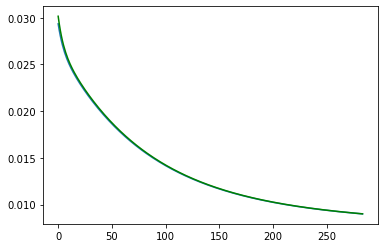

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(gr2)
plt.plot(gr1,color='g')
plt.show()

In [9]:
x_1 = 1500
x_2 = 3
x_1norm = (x_1 - med(x1))/(max(x1)-min(x1))
x_2norm = (x_2 - med(x2))/(max(x2)-min(x2))
y_norm = h(c0, c1, c2, x0, x_1norm, x_2norm)
print(y_norm)

-0.0170567886332834


In [10]:
y1 = med(y) + y_norm * (max(y) - min(y))

In [11]:
print(y1)

290859.9020243598
